<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Grundlagen Programmierung</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# Structured Query Language

SQL ist die wichtigste Sprache zur Auswertung und Manipulation von relational strukturierten Daten. Überlicher Weise wird diese Sprache genutzt, um direkt mit einer Datenbank zu kommunizieren.

Dieses Jupyter-Notebook enthält stattdessen eine Tabelle (im DataFrame ```performance_data```), die wird im Folgenden wie eine SQL-Datenbank über SQL-Befehle auswerten. 

## Vorbereitung des Notebooks

Hier nichts verändern. Zunächst werden einige Befehle ausgeführt, im die nötigen Python-Pakte zu installieren.

✍️ **Aufgabe**

Führen Sie die folgende Zelle aus.

In [2]:
# Installiert Paket, damit man SQL-Befehle auf Dataframes anwenden kann
!pip install pandasql

# Lädt Paket, damit man Dataframes (Tabellen in Python) anwenden kann
import pandas as pd
# Lädt Paket, damit man SQL-Befehle auf Dataframes anwenden kann
import pandasql as ps

import numpy as np

## Datenbeschreibung

✍️ Laden Sie zunächst die CSV-Datei `Staedtischer_Baumkataster.csv` aus Sakai hier hier hoch.

Dazu müssen Sie auf der liken Seite zurnächst auf das Ordner-Symbol und dann auf den Upload-Pfeil klicken und die Datei auswählen.
Neben den bekannten Daten wird dem Datensatz noch eine Spalte mit (fiktiven) Baumhöhen hinzugefügt.

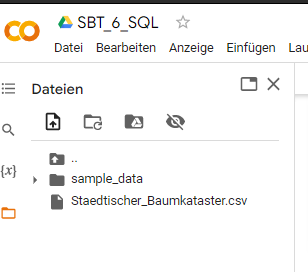

In der Vergangenheit (2022) kam es hier zu Problemen beim Firefox Browser. Wenn Probleme beim Upload auftreten, testen Sie einen anderen Webbrowser.

Im nächsten Schritt werden die Daten von Python aus der CSV-Datei in einen DataFrame geladen. Dies ist ein spezieller Datentyp für Tabellen.

Zudem wird eine zufällig Baumhöhe simuliert, die nicht in den ursprünglichen Daten enthalten ist.

In [3]:
# Lade die Daten in einen pandas Dataframe namens "performance_data"
performance_data = pd.read_csv("Staedtischer_Baumkataster.csv", delimiter = ";")

performance_data["X"] = performance_data["X"].str.replace(",",".").astype("float")
performance_data["Y"] = performance_data["Y"].str.replace(",",".").astype("float")
performance_data["Lon"] = performance_data["Lon"].str.replace(",",".").astype("float")
performance_data["Lat"] = performance_data["Lat"].str.replace(",",".").astype("float")

# Setting a random seed, so everyone has the same data
np.random.seed(10)

# Random hight, no real data
performance_data["Height_m"] = np.random.randint(2,20, size=len(performance_data))

# Zeige performance_data an
performance_data



,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat,Height_m
0,1,Kaiser-Franz-Joseph-Straße,17,Winterlinde,Tilia cordata,NaN,81264.6040,238116.5790,11.407063,47.276884,11
1,2,Kaiser-Franz-Joseph-Straße,18,Winterlinde,Tilia cordata,NaN,81257.6270,238109.1460,11.406970,47.276818,6
2,3,Kaiser-Franz-Joseph-Straße,19,Winterlinde,Tilia cordata,NaN,81251.1200,238102.3230,11.406882,47.276757,17
3,4,Kaiser-Franz-Joseph-Straße,23,Winterlinde,Tilia cordata,NaN,81223.8600,238073.6500,11.406517,47.276503,2
4,5,Kaiser-Franz-Joseph-Straße,26,Winterlinde,Tilia cordata,NaN,81203.5300,238052.2200,11.406244,47.276313,19
...,...,...,...,...,...,...,...,...,...,...,...
13412,13413,Friedhof Mühlau,76,Föhre,Pinus sylvestris,NaN,81875.3952,238982.9465,11.415293,47.284599,13
13413,13414,Haller Straße - West,128,Hopfenbuche,Ostrya carpinifolia,19.11.2020,83057.0921,237967.1521,11.430722,47.275316,13
13414,13415,Hans-Flöckinger-Promenade,117,Japanische Nelken - Kirsche,Prunus serrulata 'Pink Perfektion',25.11.2020,78932.1855,235878.7458,11.375848,47.257042,3
13415,13416,Hans-Flöckinger-Promenade,178,Zierkirsche,Prunus subhirtella 'Accolade',26.11.2020,78667.3363,235545.6759,11.372291,47.254079,16


## SQL-Befehle

Die `ps.sqldf()` Funktion erlaubt es SQL-Befehle statt auf Datenbank auf pandas Dataframes auszuführen. Wir setzen das ein, um uns die Einrichtung einer echten Datenbank für diese Übung zu sparten. Der Funktion wird der eigentliche SQL-Befehl als Sting übergeben:

```"SELECT * FROM performance_data"```

SELECT und FROM sind Schlüsselwörter der SQL-Sprache und werden deswegen großgeschrieben. ```performance_data``` ist der Name der Tabelle/Relation von der wir abfragen wollen. das ```*``` ist eine sogenannte Wildcard und bedeuted, dass wir alle Attribute der Tabelle ausgeben wollen:

Um den SQL-Befehl in Python zu nutzen, müssen wir ihn nun in die `ps.sqldf()` Funktion verpacken:

```ps.sqldf("""SELECT * FROM performance_data""") # Gibt die gesamte Tabelle performance_data aus```

Wir setzen dreifache Anführungszeichen um den SQL-Befehl, da wir somit auch einfache Anführungszeichen im SQL-Befehl selbst nutzen können, ohne dass Python den String beim zweiten Auftreten eines Anführungszeichens für beendet hält.

[Hier](https://www.dataquest.io/blog/sql-basics/) findet sich eine ausführliche Erklärung dieser und weiterer SQL-Befehle.

In [4]:
ps.sqldf("SELECT * FROM performance_data") # Gibt die gesamte Tabelle performance_data aus

,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat,Height_m
0,1,Kaiser-Franz-Joseph-Straße,17,Winterlinde,Tilia cordata,None,81264.6040,238116.5790,11.407063,47.276884,11
1,2,Kaiser-Franz-Joseph-Straße,18,Winterlinde,Tilia cordata,None,81257.6270,238109.1460,11.406970,47.276818,6
2,3,Kaiser-Franz-Joseph-Straße,19,Winterlinde,Tilia cordata,None,81251.1200,238102.3230,11.406882,47.276757,17
3,4,Kaiser-Franz-Joseph-Straße,23,Winterlinde,Tilia cordata,None,81223.8600,238073.6500,11.406517,47.276503,2
4,5,Kaiser-Franz-Joseph-Straße,26,Winterlinde,Tilia cordata,None,81203.5300,238052.2200,11.406244,47.276313,19
...,...,...,...,...,...,...,...,...,...,...,...
13412,13413,Friedhof Mühlau,76,Föhre,Pinus sylvestris,None,81875.3952,238982.9465,11.415293,47.284599,13
13413,13414,Haller Straße - West,128,Hopfenbuche,Ostrya carpinifolia,19.11.2020,83057.0921,237967.1521,11.430722,47.275316,13
13414,13415,Hans-Flöckinger-Promenade,117,Japanische Nelken - Kirsche,Prunus serrulata 'Pink Perfektion',25.11.2020,78932.1855,235878.7458,11.375848,47.257042,3
13415,13416,Hans-Flöckinger-Promenade,178,Zierkirsche,Prunus subhirtella 'Accolade',26.11.2020,78667.3363,235545.6759,11.372291,47.254079,16


## Projektion

Durch eine Projektion werden einzelne Attribute aus einer Tabelle abgefragt. Hierzu werden die Attribute hinter der SELECT genannt und mit einen Komma voneinander abgetrennt.

```ps.sqldf("SELECT Anlage FROM performance_data") # Gibt Anlage aus```


```ps.sqldf("SELECT Anlage, Baumnummer FROM performance_data") # Gibt Anlage und Baumnummer aus```

In [5]:
# Beispiel
ps.sqldf("SELECT Anlage FROM performance_data") # Gibt sex aus

,Anlage
0,Kaiser-Franz-Joseph-Straße
1,Kaiser-Franz-Joseph-Straße
2,Kaiser-Franz-Joseph-Straße
3,Kaiser-Franz-Joseph-Straße
4,Kaiser-Franz-Joseph-Straße
...,...
13412,Friedhof Mühlau
13413,Haller Straße - West
13414,Hans-Flöckinger-Promenade
13415,Hans-Flöckinger-Promenade


In [6]:
# Beispiel
ps.sqldf("SELECT Anlage, Baumnummer  FROM performance_data") # Gibt gender und age aus

,Anlage,Baumnummer
0,Kaiser-Franz-Joseph-Straße,17
1,Kaiser-Franz-Joseph-Straße,18
2,Kaiser-Franz-Joseph-Straße,19
3,Kaiser-Franz-Joseph-Straße,23
4,Kaiser-Franz-Joseph-Straße,26
...,...,...
13412,Friedhof Mühlau,76
13413,Haller Straße - West,128
13414,Hans-Flöckinger-Promenade,117
13415,Hans-Flöckinger-Promenade,178


## Selektion

Auswahl einer Untermenge aller Tupel einer Tabelle.
Die Selektion wird durch zusätzliche Schlüsselwörter hinter der Auswahl der Tabelle (FROM performance_data) angefügt.

Beispielsweise lässt sich die Ausgabe auf fünf Einträge begrenzen:

```ps.sqldf("SELECT Anlage, Baumnummer FROM performance_data LIMIT 5")```


In [7]:
# Beispiel
ps.sqldf("SELECT Anlage, Baumnummer FROM performance_data LIMIT 5") # Gibt die ersten  Einträge aus

,Anlage,Baumnummer
0,Kaiser-Franz-Joseph-Straße,17
1,Kaiser-Franz-Joseph-Straße,18
2,Kaiser-Franz-Joseph-Straße,19
3,Kaiser-Franz-Joseph-Straße,23
4,Kaiser-Franz-Joseph-Straße,26


## Besprechung der Aufgaben

- Sind Sie mit ein Aufgaben bis hierhin fertig geworden und haben Sie keine Fragen, so legen Sie die grüne Karte nach oben
- Sind Sie mit den Aufgaben fertig, aber hätten gerne, dass die Lösungen nocheinmal gemeinsam besprochen werden, legen Sie die gelbe Karte nach oben

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### Filtern

- Eine besondere Art von Selektion ist das Filtern
- Beim Filtern wird das Schlüsselwort ```WHERE``` genutzt. Darauf folgt eine logische Abfrage z.B. bezüglich des Attributs ```Anlage``` ob dieses der `"	Kaiser-Franz-Joseph-Straße"` entspricht.

```ps.sqldf("""SELECT Anlage, Baumnummer, Gattung_Dt FROM performance_data WHERE Anlage="Kaiser-Franz-Joseph-Straße" """)```

*Vorsicht:* der SQL-Befehl enthält " um den String zu kennzeichnen. Damit Python diesen nicht mit dem Anfang und Ende der SQL-Abfrage verwechselt, wird diese jetzt mit """ (drei ") gekennzeichnet *

In [8]:
# Beispiel
ps.sqldf("""SELECT Anlage, Baumnummer, Gattung_Dt FROM performance_data WHERE Anlage="Kaiser-Franz-Joseph-Straße" """)

,Anlage,Baumnummer,Gattung_Dt
0,Kaiser-Franz-Joseph-Straße,17,Winterlinde
1,Kaiser-Franz-Joseph-Straße,18,Winterlinde
2,Kaiser-Franz-Joseph-Straße,19,Winterlinde
3,Kaiser-Franz-Joseph-Straße,23,Winterlinde
4,Kaiser-Franz-Joseph-Straße,26,Winterlinde
5,Kaiser-Franz-Joseph-Straße,27,Winterlinde
6,Kaiser-Franz-Joseph-Straße,28,Winterlinde
7,Kaiser-Franz-Joseph-Straße,29,Winterlinde
8,Kaiser-Franz-Joseph-Straße,30,Winterlinde
9,Kaiser-Franz-Joseph-Straße,31,Winterlinde


Filter-Operationen können auch vergleichend sein (größer, kleiner, etc.) und können mit logischen Operatoren verknüpft werden z.B. mit `AND` um nur Einträge zu finden, bei denen zwei Bedingungen zutreffen:


In [26]:
# Beispiel
ps.sqldf("""SELECT * FROM performance_data WHERE Lat<	47.27688375 AND  Lon>11.4068823""") 

,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat
0,2,Kaiser-Franz-Joseph-Straße,18,Winterlinde,Tilia cordata,None,81257.6270,238109.1460,11.406970,47.276818
1,3,Kaiser-Franz-Joseph-Straße,19,Winterlinde,Tilia cordata,None,81251.1200,238102.3230,11.406882,47.276757
2,17,Kapuzinergasse,5,Roßkastanie,Aesculus hippocastanum,None,81292.5500,237539.7700,11.407328,47.271693
3,18,Kapuzinergasse,8,Winterlinde,Tilia cordata,None,81333.8010,237561.4920,11.407877,47.271883
4,19,Kapuzinergasse,10,Winterlinde,Tilia cordata,None,81346.7740,237569.6300,11.408050,47.271955
...,...,...,...,...,...,...,...,...,...,...
6035,13403,Grüngürtel Reichenau West - Spiel- und Sportan...,69,Ginkgo,Ginkgo biloba,26.11.2020,82221.1901,237754.5043,11.419637,47.273509
6036,13404,Grüngürtel Reichenau West - Spiel- und Sportan...,70,Säulenamberbaum,Liquidambar styraciflua 'Fastigiata',26.11.2020,82227.1965,237771.3789,11.419720,47.273660
6037,13405,Grüngürtel Reichenau West - Spiel- und Sportan...,71,Tulpenbaum,Liriodendron tulipifera,26.11.2020,82213.3743,237750.6546,11.419533,47.273475
6038,13406,Grüngürtel Reichenau West - Spiel- und Sportan...,72,Winterlinde,Tilia cordata,26.11.2020,82208.0073,237758.5301,11.419464,47.273547


## Ausgaben verarbeiten

### Sortieren

Ausgaben können auch weiterverarbeitet werden, um beispielsweise Reports zu erstellen.

Hier werden durch das Kennwort ```ASC``` die Ausgaben nach dem davor genannten Attribut ```Lat``` geordnet ausgegeben. ```DESC``` ist das Schlüsselwort für eine umgekehrte Anordnung.

```
ps.sqldf("""SELECT * FROM performance_data ORDER BY Lat ASC """) 
```

In [27]:
# Beispiel
ps.sqldf("""SELECT * FROM performance_data ORDER BY Lat ASC """) 

,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat
0,3773,Fernkreuzweg - Spielplatz,19,Mehlbeere,Sorbus aria,None,80954.1600,232324.5800,11.401915,47.224834
1,4258,Fernkreuzweg - Spielplatz,1,Mehlbeere,Sorbus aria,None,80972.1000,232326.9500,11.402153,47.224853
2,3774,Fernkreuzweg - Spielplatz,20,Rotblättriger Spitzahorn,Acer platanoides 'Schwedleri',None,80958.1800,232327.2900,11.401969,47.224858
3,3772,Fernkreuzweg - Spielplatz,18,Bergahorn,Acer pseudoplatanus,None,80944.4400,232328.3200,11.401788,47.224868
4,4363,Fernkreuzweg - Spielplatz,17,Mehlbeere,Sorbus aria,None,80949.9700,232332.8100,11.401861,47.224908
...,...,...,...,...,...,...,...,...,...,...
13412,6082,Josef-Schraffl-Straße,8,Nichtfruchtende Esche,Fraxinus excelsior 'Westhof's Glorie',22.10.2015,81941.4109,239525.1977,11.416264,47.289468
13413,6377,Josef-Schraffl-Straße,4,Gemeine Esche,Fraxinus excelsior,None,81952.2634,239526.2612,11.416408,47.289476
13414,6083,Josef-Schraffl-Straße,9,Nichtfruchtende Esche,Fraxinus excelsior 'Westhof's Glorie',22.10.2015,81964.4205,239527.3937,11.416569,47.289485
13415,6378,Josef-Schraffl-Straße,7,Gemeine Esche,Fraxinus excelsior,None,81989.2690,239528.8456,11.416898,47.289494


### Aggregation

Über der Schlüsselwort ```SUM``` lassen sich Summen über Attribute bilden.

```
ps.sqldf("""SELECT SUM(Height_m) FROM performance_data""") 
```


In [36]:
# Beispiel
ps.sqldf("""SELECT SUM(Height_m) FROM performance_data""") 

,SUM(Height_m)
0,141126


Es lassen sich auch Summen über mehrere Attribute erzeugen, z.B. um die Baumnummern und die Höhen aufzuaddieren:

```
ps.sqldf("""SELECT SUM(Height_m), SUM(Baumnummer) FROM performance_data""") 
```

In [37]:
# Beispiel
ps.sqldf("""SELECT SUM(Height_m), SUM(Baumnummer) FROM performance_data""") 

,SUM(Height_m),SUM(Baumnummer)
0,141126,989802.0


Außerdem lassen sich die Summen über ein Subset (Selektion) bilden.

Hier werden z.B. nur die Höhen der Bergahorn summiert:

```
ps.sqldf("""SELECT SUM(Height_m) FROM performance_data WHERE Gattung_dt="Bergahorn" """) 
```


In [38]:
# Beispiel
ps.sqldf("""SELECT SUM(Height_m) FROM performance_data WHERE Gattung_dt="Bergahorn" """) 

,SUM(Height_m)
0,5964


Es gibt auch weitere Befehle zur Aggregation, wie z.B. ```COUNT```
Hier werden alle Tupel (Zeilen in der Tabelle) gezählt:

```
ps.sqldf("""SELECT COUNT(*) FROM performance_data""") 
```


In [106]:
# Beispiel Anzahl aller Einträge
ps.sqldf("""SELECT COUNT(*) FROM performance_data""") 

,COUNT(*)
0,13417


##  Aufgaben

Nutzen Sie die oben vorgestellten Befehle, um die folgenden Aufgaben zu lösen:

1. ✍️ Was sind die größten vier Bäume?

In [41]:
# Lösung
ps.sqldf(""" SELECT * FROM performance_data ORDER BY Height_m DESC LIMIT 4 """) 

,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat,Height_m
0,6,Kaiser-Franz-Joseph-Straße,27,Winterlinde,Tilia cordata,None,81196.580,238044.950,11.406151,47.276248,19
1,7,Kaiser-Franz-Joseph-Straße,28,Winterlinde,Tilia cordata,None,81189.780,238038.020,11.406060,47.276187,19
2,13,Kaiser-Josef-Straße,31,Gemeine Esche,Fraxinus excelsior,None,79929.750,236491.980,11.389134,47.262437,19
3,30,Klappholzstraße,19,Vogelkirsche,Prunus avium,None,82046.974,237292.478,11.417251,47.269375,19


Möchten wir nicht alle, sondern nur ein einzigen kleinsten oder größten Wert, können wir diesen auch über die `Min()` und `Max()` Funktion abfragen:

In [74]:
ps.sqldf(""" SELECT *, Max(Height_m) FROM performance_data""") 

,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat,Height_m,Max(Height_m)
0,6,Kaiser-Franz-Joseph-Straße,27,Winterlinde,Tilia cordata,None,81196.58,238044.95,11.406151,47.276248,19,19


2. ✍️ Wie viele Bäume stehen in der Klappholzstraße?

In [42]:
# Lösung
ps.sqldf("""SELECT count(*) FROM performance_data WHERE Anlage="Klappholzstraße" """) 

,count(*)
0,24


Neben der Summation gibt es noch weitere Operationen, um das Minimum (```MIN```), Maximum (```MAX```) oder den Durchschnitt (```AVG```) zu finden.

So lässt sich zum Beispiel die durchschnittliche Höhe der Bäume bestimmen:

```
ps.sqldf(""" SELECT AVG(Height_m) FROM performance_data """)
```

3. ✍️ Wie groß sind Winterlinden vergleichen mit Vogelkirschen im Durchschnitt? 

Nutzen Sie dazu zwei separate Befehle. Später lernen wir, wie dies auch mit einem Befehl möglich ist.



In [43]:
# Lösung
ps.sqldf(""" SELECT AVG(Height_m) FROM performance_data WHERE Gattung_Dt = "Winterlinde" """) 

,AVG(Height_m)
0,10.329768


In [44]:
# Lösung
ps.sqldf(""" SELECT AVG(Height_m) FROM performance_data WHERE Gattung_Dt = "Vogelkirsche" """) 

,AVG(Height_m)
0,10.594595


4. ✍️ Wie viele gemeine Eschen (Gattung_Dt = "Gemeine Esche") wachsen südlicher als Lat = 47.27 ?

In [49]:
# Lösung
ps.sqldf(""" SELECT Count(*) FROM performance_data WHERE Gattung_Dt = "Gemeine Esche" and Lat<47.27""") 

,Count(*)
0,246


### Gruppieren

Operationen, wie ```AVG```, `MIN` und `MAX`  lassen sich mit den Schlüsselwort ```GROUP BY``` automatisiert für mehrere Gruppen durchführen. So lässt sich z.B. die Höhe getrennt nach Gattung auswerten.

```
ps.sqldf("""SELECT Gattung_Dt, AVG(Height_m) FROM performance_data GROUP BY Gattung_Dt""")
```

In [52]:
# Beispiel
ps.sqldf("""SELECT Gattung_Dt, AVG(Height_m) FROM performance_data GROUP BY Gattung_Dt""") 

,Gattung_Dt,AVG(Height_m)
0,Abendländischer Lebensbaum,10.371429
1,Allershausener Spitzahorn,15.100000
2,Amberbaum,10.458716
3,Amerikanische Linde,18.000000
4,Amerikanischer Zürgelbaum,15.333333
...,...,...
268,Zuckerahorn,15.000000
269,Zöschener Ahorn,12.750000
270,Zürgelbaum,10.294118
271,Ölweide,6.666667


Hiermit können wir auch die Frage 3 mit einem einzelnen Befehl lösen:

In [ ]:
ps.sqldf("""SELECT Gattung_Dt, AVG(Height_m)  FROM performance_data WHERE Gattung_Dt="Winterlinde" or Gattung_Dt="Vogelkirsche" GROUP BY Gattung_Dt  """) 

5. ✍️ Was sind die kleinsten Baumarten?

In [55]:
# Lösung
ps.sqldf("""SELECT Gattung_Dt, AVG(Height_m) FROM performance_data GROUP BY Gattung_Dt ORDER BY AVG(Height_m)  ASC """) 

,Gattung_Dt,AVG(Height_m)
0,Geschlitzter Silberahorn,2.000000
1,Amur Korkbaum,2.500000
2,Großer Lebensbaum,3.000000
3,Pavie,3.000000
4,Goldscheinakazie,4.000000
...,...,...
268,Säulenzitterpappel,17.333333
269,Kugelförmige Blumenesche,17.500000
270,Amerikanische Linde,18.000000
271,Steinweichsel,18.000000


## Besprechung der Aufgaben

- Sind Sie mit ein Aufgaben bis hierhin fertig geworden und haben Sie keine Fragen, so legen Sie die grüne Karte nach oben
- Sind Sie mit den Aufgaben fertig, aber hätten gerne, dass die Lösungen nocheinmal gemeinsam besprochen werden, legen Sie die gelbe Karte nach oben

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### Speichern der Ergebnisse

Die Ergebnisse lassen sich über eine Zuweisung in einem neuen DataFrame speichern und dann z.B. als CSV Datei für einen Report zu extrahieren.

In [56]:
# Beispiel
new_table = ps.sqldf("""SELECT Gattung_Dt, AVG(Height_m) FROM performance_data GROUP BY Gattung_Dt ORDER BY AVG(Height_m)  ASC """)
print(new_table)

                   Gattung_Dt  AVG(Height_m)
0    Geschlitzter Silberahorn       2.000000
1               Amur Korkbaum       2.500000
2           Großer Lebensbaum       3.000000
3                       Pavie       3.000000
4            Goldscheinakazie       4.000000
..                        ...            ...
268        Säulenzitterpappel      17.333333
269  Kugelförmige Blumenesche      17.500000
270       Amerikanische Linde      18.000000
271             Steinweichsel      18.000000
272   Säulenförmiger Rotahorn      18.000000

[273 rows x 2 columns]


### Logische Verknüpfungen

Durch die logischen Operatoren ```OR```und ```AND``` lassen sich auch komplexere Abfragen gestalten. Zum Beispiel die Suche nach besonders großen Bäumen in einem Park:

```ps.sqldf(""" SELECT AVG(VO2_max), height, weight FROM performance_data WHERE height < 170 AND weight > 90 """)```

In [58]:
# Beispiel
ps.sqldf(""" SELECT * FROM performance_data WHERE Height_m > 17 AND Anlage = "Klappholzstraße" """) 


,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat,Height_m
0,30,Klappholzstraße,19,Vogelkirsche,Prunus avium,None,82046.9740,237292.4780,11.417251,47.269375,19
1,35,Klappholzstraße,27,Vogelkirsche,Prunus avium,None,82134.8810,237369.2040,11.418426,47.270055,18
2,37,Klappholzstraße,29,Japanischer Schnurbaum,Sophora japonica,None,82161.3790,237412.7580,11.418784,47.270443,19
3,1698,Klappholzstraße,12,Vogelkirsche,Prunus avium,None,81995.4350,237264.3940,11.416564,47.269129,19
4,1699,Klappholzstraße,13,Eschenahorn,Acer negundo,None,82000.1410,237260.0190,11.416626,47.269089,18
5,8273,Klappholzstraße,17,Vogelkirsche,Prunus avium,None,82024.5620,237278.1770,11.416952,47.269250,18
6,12898,Klappholzstraße,9,Gefülltblühende Vogelkirsche,Prunus avium 'Plena',30.11.2021,81969.9669,237255.9202,11.416226,47.269056,19


# ✍️ Aufgaben

1. ✍️  In welcher Anlage stehen die meisten Bäume?

In [65]:
ps.sqldf(""" SELECT Anlage, COUNT(*) FROM performance_data GROUP BY Anlage ORDER BY COUNT(*)""") 

,Anlage,COUNT(*)
0,Am See,1
1,An-der-Lan-Str. 41/43 - Spielplatz,1
2,Andreas Hoferstraße 39,1
3,Anna-Stainer-Knittel-Weg,1
4,Botanikerstraße,1
...,...,...
622,Pradl,294
623,Kranebitter Allee,297
624,Grünbacher-Promenade,367
625,Roßaupromenade,378


2. ✍️ Was ist die häufigste Baumart?

In [67]:
ps.sqldf(""" SELECT Gattung_Dt, COUNT(*) FROM performance_data GROUP BY Gattung_Dt ORDER BY COUNT(*)""") 

,Gattung_Dt,COUNT(*)
0,Birkenpappel,1
1,Echter Mammutbaum,1
2,Frühlingstamariske,1
3,Goldgelber Tulpenbaum,1
4,Großer Lebensbaum,1
...,...,...
268,Winterlinde,561
269,Bergahorn,563
270,Roßkastanie,603
271,Sandbirke,617


3. ✍️ Welche ist der westlichste Baum?



In [68]:
ps.sqldf(""" SELECT * FROM performance_data ORDER BY Lon ASC""") 

,OBJECTID,Anlage,Baumnummer,Gattung_Dt,Gattung_Lat,Pflanzdatum,X,Y,Lon,Lat,Height_m
0,12928,Kranebitter Allee - Umkehrschleife,1,Rotblättriger Spitzahorn,Acer platanoides 'Schwedleri',18.11.2021,75060.1784,236687.1221,11.324835,47.264765,19
1,9921,Kranebitter Allee - Umkehrschleife,3,Hopfenbuche,Ostrya carpinifolia,04.12.2019,75068.4121,236664.8931,11.324940,47.264564,3
2,12929,Kranebitter Allee - Umkehrschleife,2,Rotblättriger Spitzahorn,Acer platanoides 'Schwedleri',18.11.2021,75074.7596,236686.2080,11.325028,47.264755,2
3,7017,Sauerweinwiese,27,Herbstflammenahorn,Acer freemanii 'Auttum Blaze',10.11.2016,75103.6790,236734.7740,11.325418,47.265189,19
4,7019,Sauerweinwiese,29,Föhre,Pinus sylvestris,10.11.2016,75106.0120,236726.6110,11.325447,47.265115,19
...,...,...,...,...,...,...,...,...,...,...,...
13412,11481,Roßaupromenade,327,Trauerweide,Salix alba 'Tristis',01.05.1983,84625.7100,237038.5100,11.451273,47.266765,12
13413,7063,Roßaupromenade,326,Gefülltblühende Vogelkirsche,Prunus avium 'Plena',14.04.2016,84642.3455,237031.1981,11.451492,47.266697,14
13414,3840,Roßaupromenade,328,Trauerweide,Salix alba 'Tristis',01.05.1983,84667.7800,237033.2000,11.451828,47.266712,8
13415,3841,Roßaupromenade,329,Trauerweide,Salix alba 'Tristis',01.05.1983,84671.9100,237037.2000,11.451884,47.266747,15


4. ✍️ Was ist der älteste und der jüngste Baum im Kataster? Wo steht er und was für eine Gattung ist es?

In [71]:
ps.sqldf("""  SELECT Anlage, Min(Pflanzdatum) FROM performance_data GROUP BY Anlage""") 

,Anlage,Min(Pflanzdatum)
0,Adamgasse,01.02.1993
1,Adamgasse - Süd,01.02.1992
2,Adolf-Pichler-Platz,08.05.2013
3,Adolf-Pichler-Platz - Spielplatz,31.10.2002
4,Alois-Schrott-Straße - Spielplatz,26.11.2018
...,...,...
622,Zeughausg.1a-Kapuzienerg.4b,None
623,Zeughausgasse,11.05.2021
624,Zollerstraße,None
625,Zollerstraße 2-4,None


In [76]:
ps.sqldf("""  SELECT Anlage, Gattung_dt, Min(Pflanzdatum) FROM performance_data""") 

,Anlage,Gattung_Dt,Min(Pflanzdatum)
0,Unterbergerstraße,Japanischer Schnurbaum,01.01.1974


In [77]:
ps.sqldf("""  SELECT Anlage, Gattung_dt, Max(Pflanzdatum) FROM performance_data""") 

,Anlage,Gattung_Dt,Max(Pflanzdatum)
0,Villa Blanka - Judenbühel - Spielplatz,Stieleiche,31.12.2020


## Besprechung der Aufgaben

- Sind Sie mit ein Aufgaben bis hierhin fertig geworden und haben Sie keine Fragen, so legen Sie die grüne Karte nach oben
- Sind Sie mit den Aufgaben fertig, aber hätten gerne, dass die Lösungen nocheinmal gemeinsam besprochen werden, legen Sie die gelbe Karte nach oben

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

# 🤓 Pandas
## Optionale Aufgabe für diejengien die schneller fertig sind:

Das Paket Pandas bietet eine etwas andere Syntax, um in Python DataFrames auszuwerten. Versuchen sie Anhand der [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) die SQL-Befehle mittels Pandas Syntax umzusetzen.

1. ✍️  In welcher Anlage stehen die meisten Bäume?

2. ✍️ Was ist die häufigste Baumart?

3. ✍️ Welche ist der westlichste Baum?

4. ✍️ Was ist der älteste und der jüngste Baum im Kataster? Wo steht er und was für eine Gattung ist es?

## 🤓 Interkative Visualisierung

Das Paket [ploty](https://plotly.com/python/scatter-plots-on-maps/) erlaubt interkative Plots und Karten zu erstellen.

In [103]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        lon = performance_data['Lon'],
        lat = performance_data['Lat'],
        text = performance_data['Gattung_Dt'],
        mode = 'markers'
        ))

In [105]:
fig.update_layout(
        title = 'Baumkataster Innsbruck <br>(Hover for tree type)',
        geo_scope='europe',
    )

fig.show()